In [1]:
import numpy as np
import pandas as pd
import sys
from sklearn import manifold
from scipy import stats,spatial,sparse

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

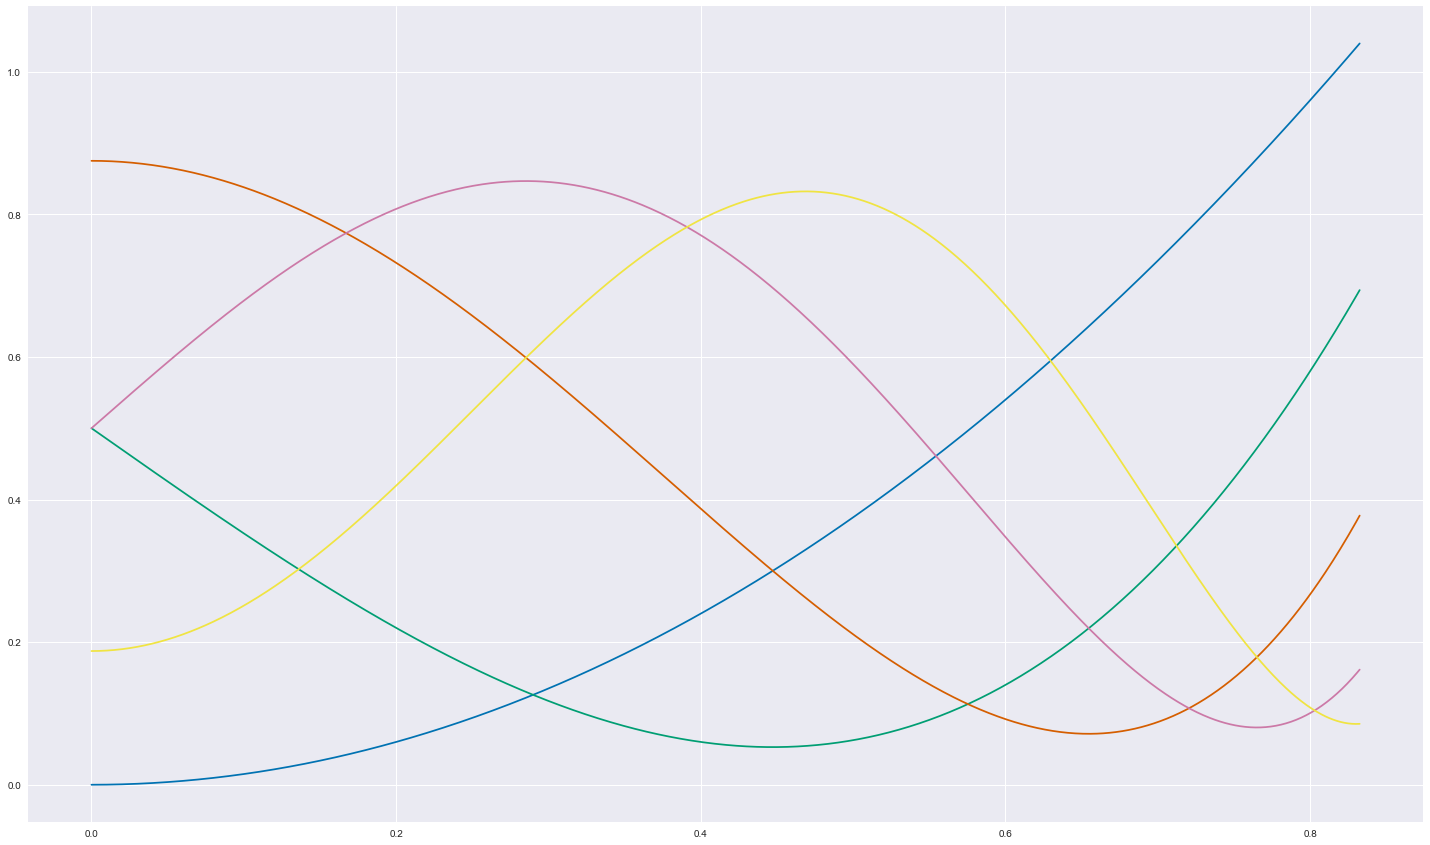

In [2]:
M = 5
N = 1200
# t = np.linspace(0,1,N)
t = np.arange(0,1,1/N)

from mpmath import *
mp.dps = 15; mp.pretty = True

f = ['f{}'.format(i) for i in range(0, M)]
x = ['x{}'.format(i) for i in range(0, M)]

for i in range(M):
    f[i]= lambda x: legendre(i+2,x)
    x[i] = [f[i](n) + 0.5 for n in t]

N = 1000

plt.figure(figsize=(25,15))
    
for i in range(M):
    plt.plot(t[:N],x[i][:N])

plt.show()

In [3]:
t = t[:N]

X = pd.DataFrame([x[0],x[1],x[2],x[3],x[4]]).iloc[:,:N]

Noise = pd.DataFrame(stats.norm.rvs(0,0.25,size=(M,N),random_state=1))

X = X + Noise

raw_df = X.transpose()

In [4]:
# V = manifold.TSNE(n_components=2, random_state=6, init='pca').fit_transform(raw_df)
V, err = manifold.locally_linear_embedding(raw_df, n_neighbors=60, n_components=2, random_state=1,method='modified')

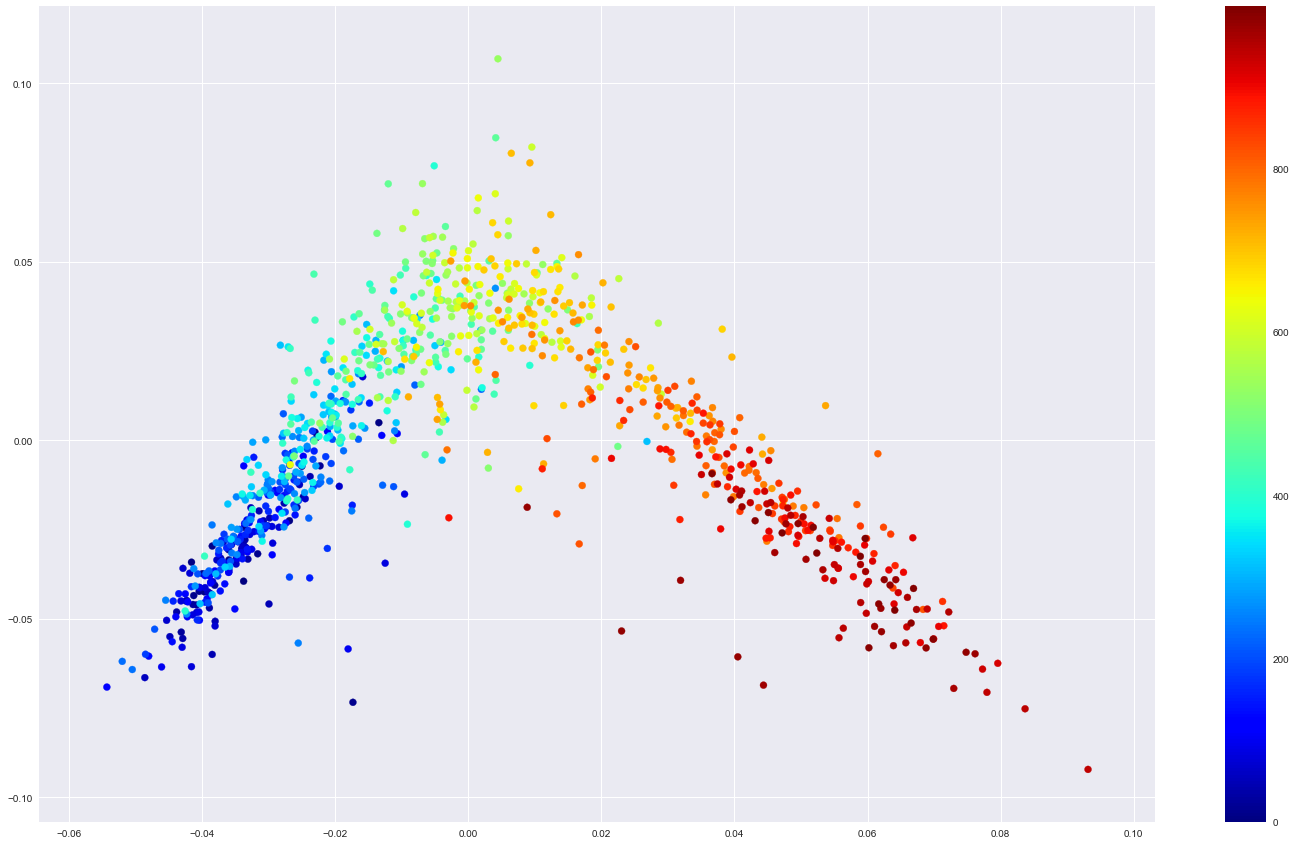

In [5]:
fig = plt.figure(figsize=(25,15))
plt.scatter(V[:,0],V[:,1], c = list(range(N)),cmap='jet')
plt.colorbar()
plt.show()

# algorithm

In [6]:
from SCOUT import *

Dimension reduction with locally_linear_embedding(LLE).



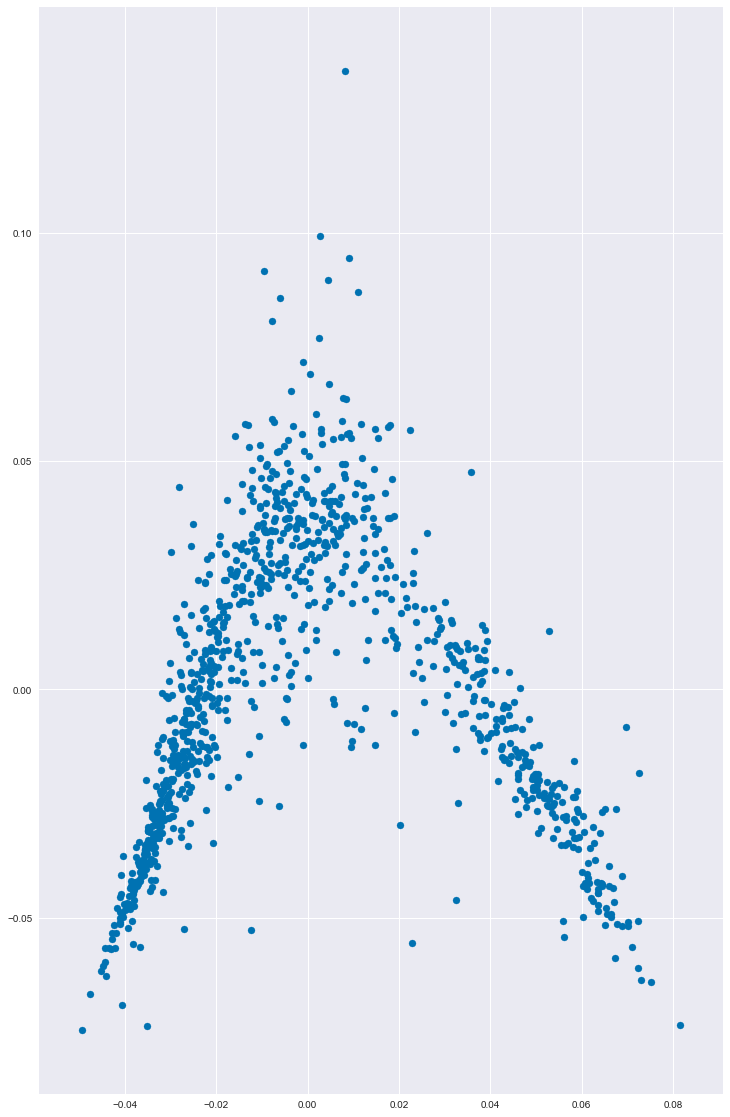

In [7]:
Z = SCOUT(raw_df)
V = Z.dim_down(method='lle',rand_seed=6)
Z.plotD(V)

Clustering with Gaussian Mixture
traj_sorted_indices [[0, 1, 2, 3, 4, 5, 6]]


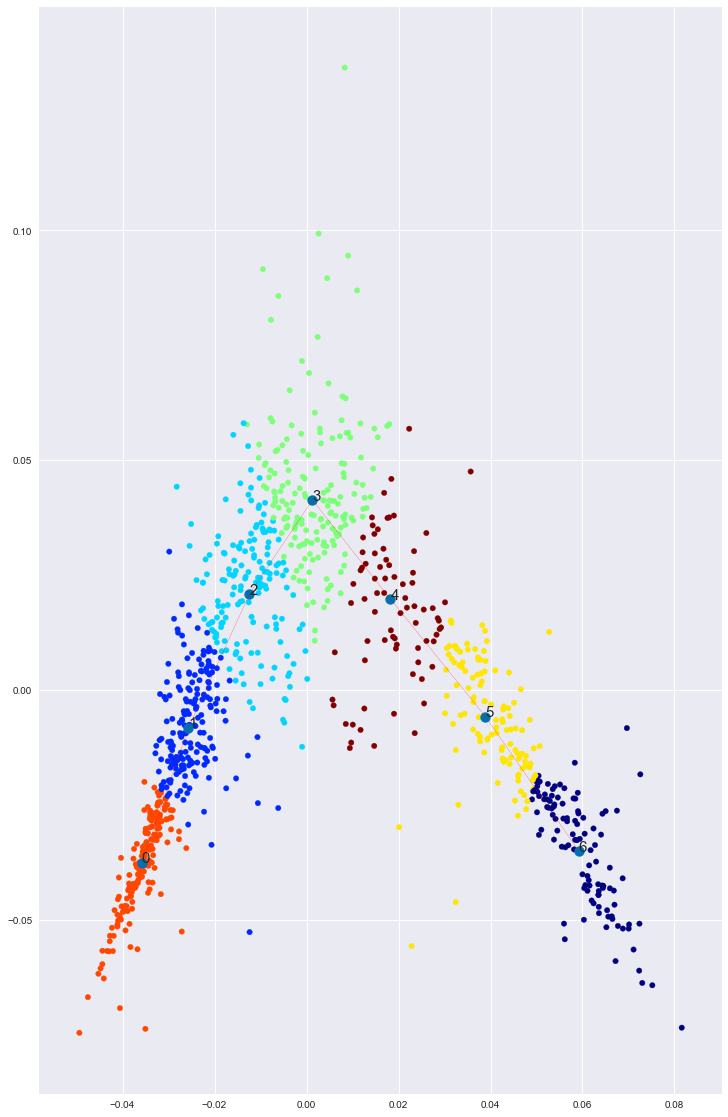

In [8]:
landmarks = Z.cluster_landmarks(V,method='GMM',nclust=7,traj_branch =True) 
Z.plotD(V)

traj_sorted_indices [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]


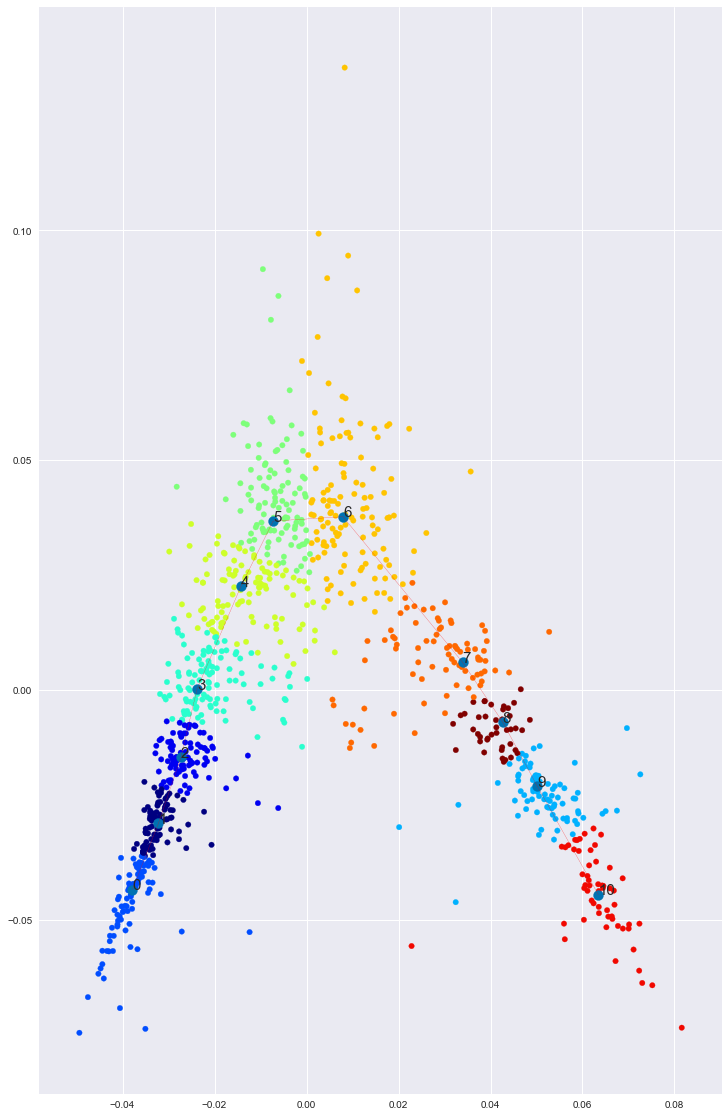

In [9]:
landmarks = Z.density_landmarks(V, r=0.015, delta=0.25,traj_branch =True) 
Z.plotD(V)

In [10]:
# branches = traj_sort_ind
branches = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
print(branches)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]


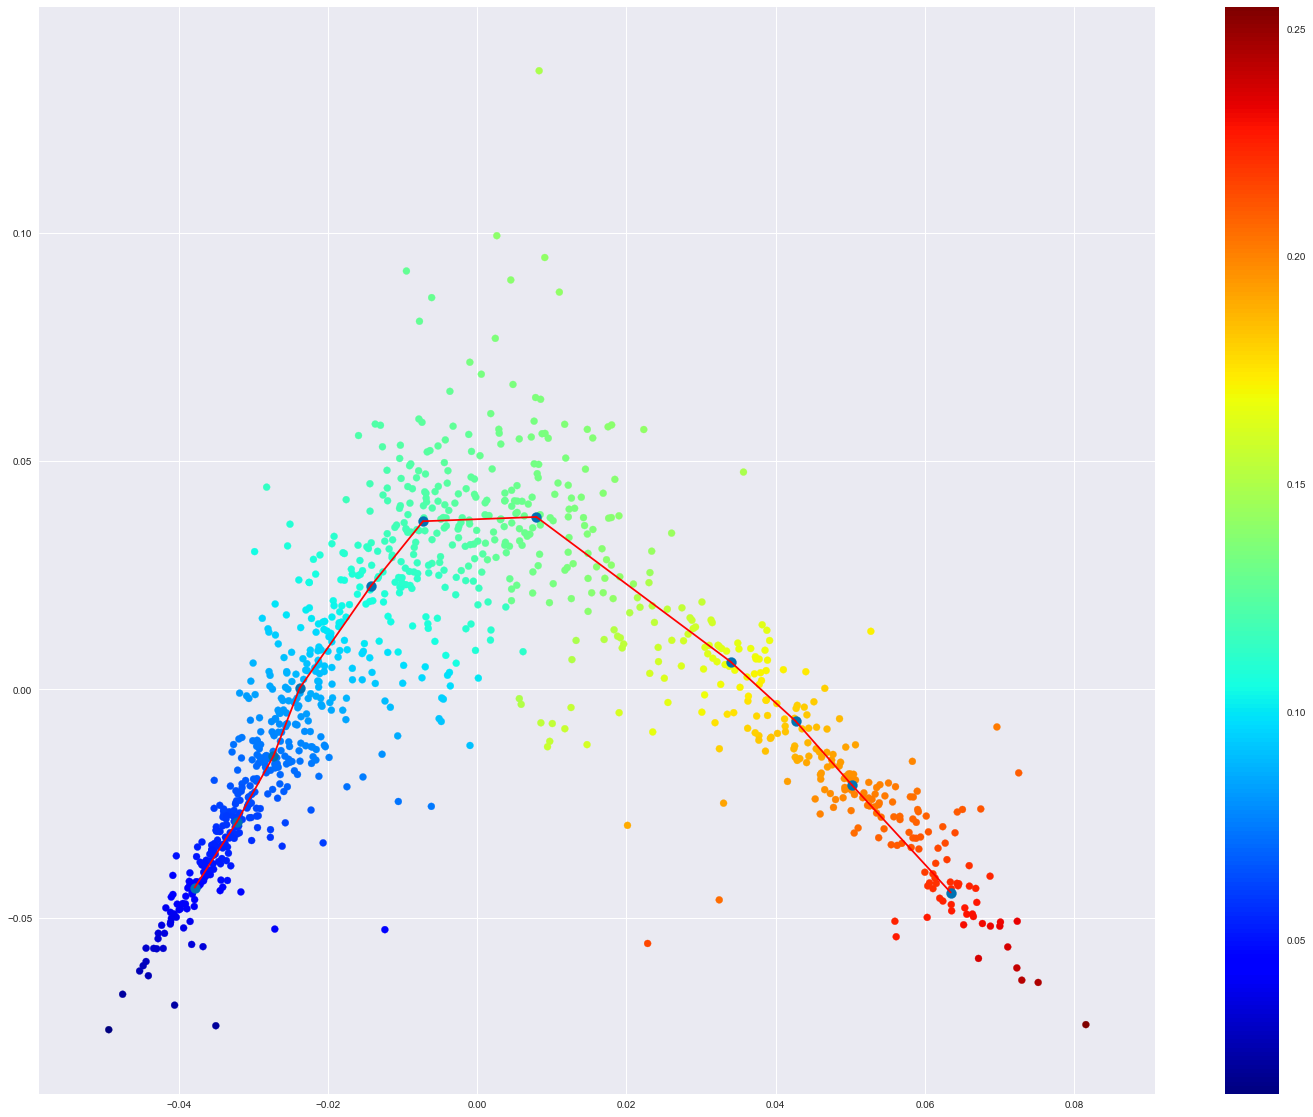

In [11]:
cell_scores,cell_order= Z.get_ordering(V,branches,method = 'wd',delta=1)

Z.plotT(V,cell_scores,dims=[0,1])

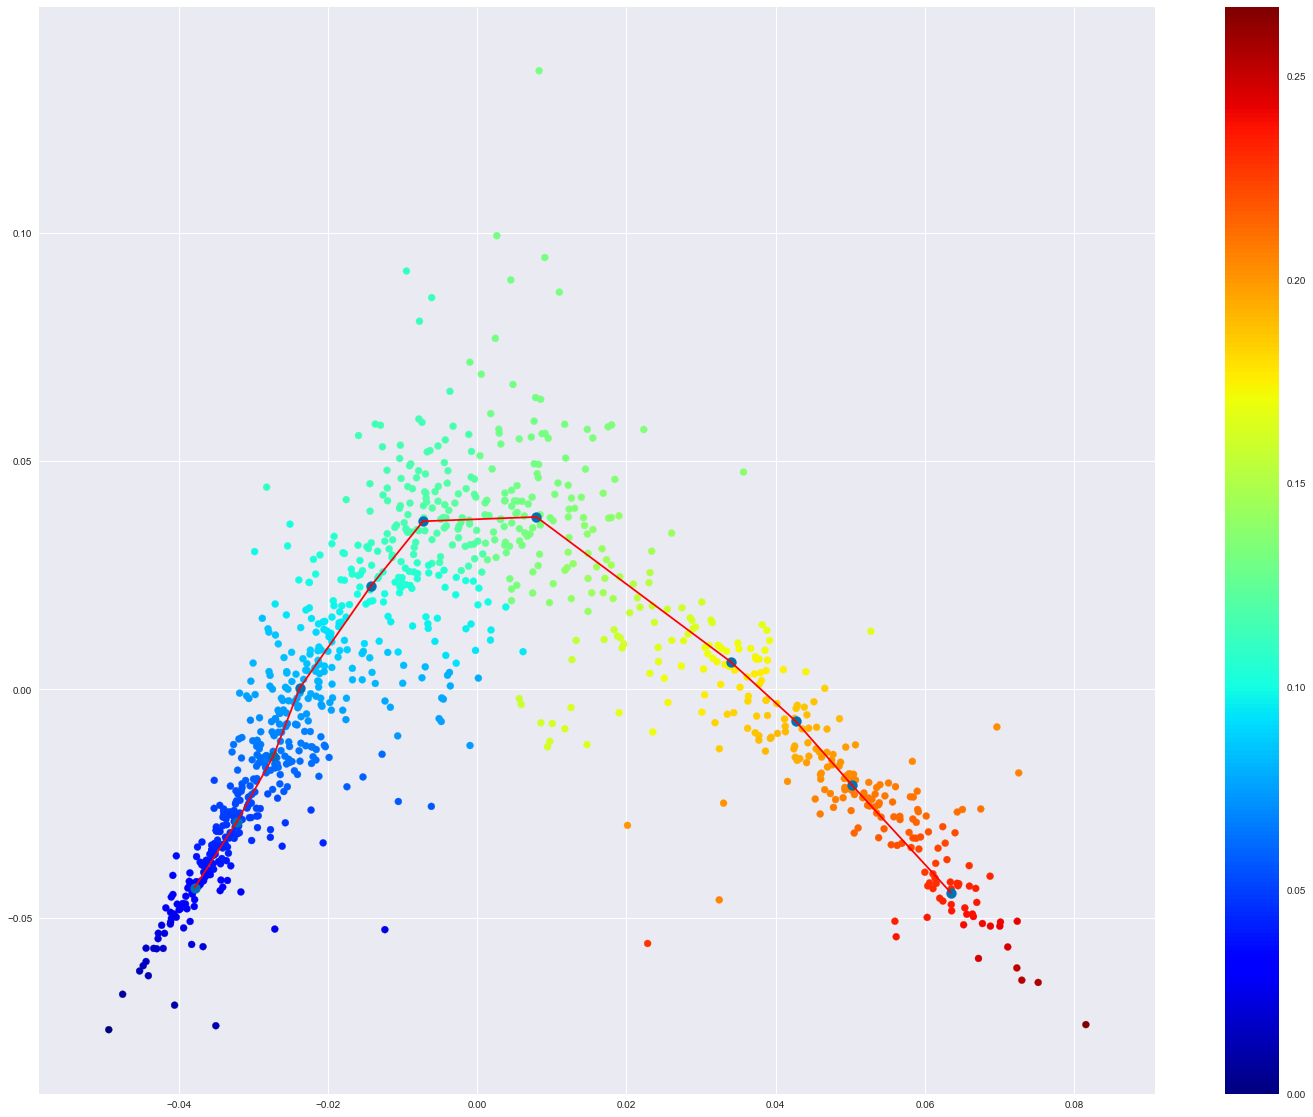

In [12]:
cell_scores,cell_order = Z.get_ordering(V,branches,method = 'ap')
Z.plotT(V,cell_scores)

In [13]:
order = cell_order[0]
Xorder0 = X.reindex(order,axis=1)
oder_real= np.linspace(0,N-1,N)
cor = stats.pearsonr(order,oder_real)[0]
cor

0.9302412062412062